# Comparer QLearning tabulaire et DQN sur quelques environnements

### Partie 1 : QLearning Tabulaire

Ci-dessous, une implémentation du QLearning tabulaire.

In [1]:
from QLearning import *

### Partie 2 : DQN

Ci-dessous, les méthodes pour entraînement et test DQN en utilisant stableBaseLines3

In [2]:
from DQN import *

### Partie 3 : Environnement LineWorld


Nous avons un couloir de taille n représenté par un array.
L'agent commence tout à gauche, et doit traverser le couloir pour arriver à droite.

Il peut soit se déplacer à gauche soit se déplacer à droite.

In [3]:
import gym
from gym import spaces

class LineWorldEnv(gym.Env):
    def __init__(self, n_states=3):
        super(LineWorldEnv, self).__init__()
        self.n_states = n_states
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Discrete(n_states)
        self.state = 0

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        if action == 0 and self.state > 0:
            self.state -= 1
        elif action == 1 and self.state < self.n_states - 1:
            self.state += 1
        done = self.state == self.n_states - 1
        reward = 10 if done else -1
        return self.state, reward, done, {}

    def render(self, mode="human"):
        print("État actuel :", self.state)
    
    def seed(self, seedInt) :
        # environnement deterministe, methode necessaire pour stablebaseline
        pass

## Observations

### 1. Comparaison convergence vers solution optimale LineWorld

On sait que la récompense obtenue au bout du couloir est de 10
Et que pour tout autre action la récompense maximale est de 1

Ainsi la récompense optimale obtensible pour un couloir de taille n >= 3 est de 12-n


Nous pouvons afficher le point (12-taille_couloir) - recompense afin que l'axe des abscisses représente la récompense maximale obtensible pour l'environnement donné.

/home/enzo/Documents/Depots/jeux_iteres_part1/customEnv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/enzo/Documents/Depots/jeux_iteres_part1/customEnv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


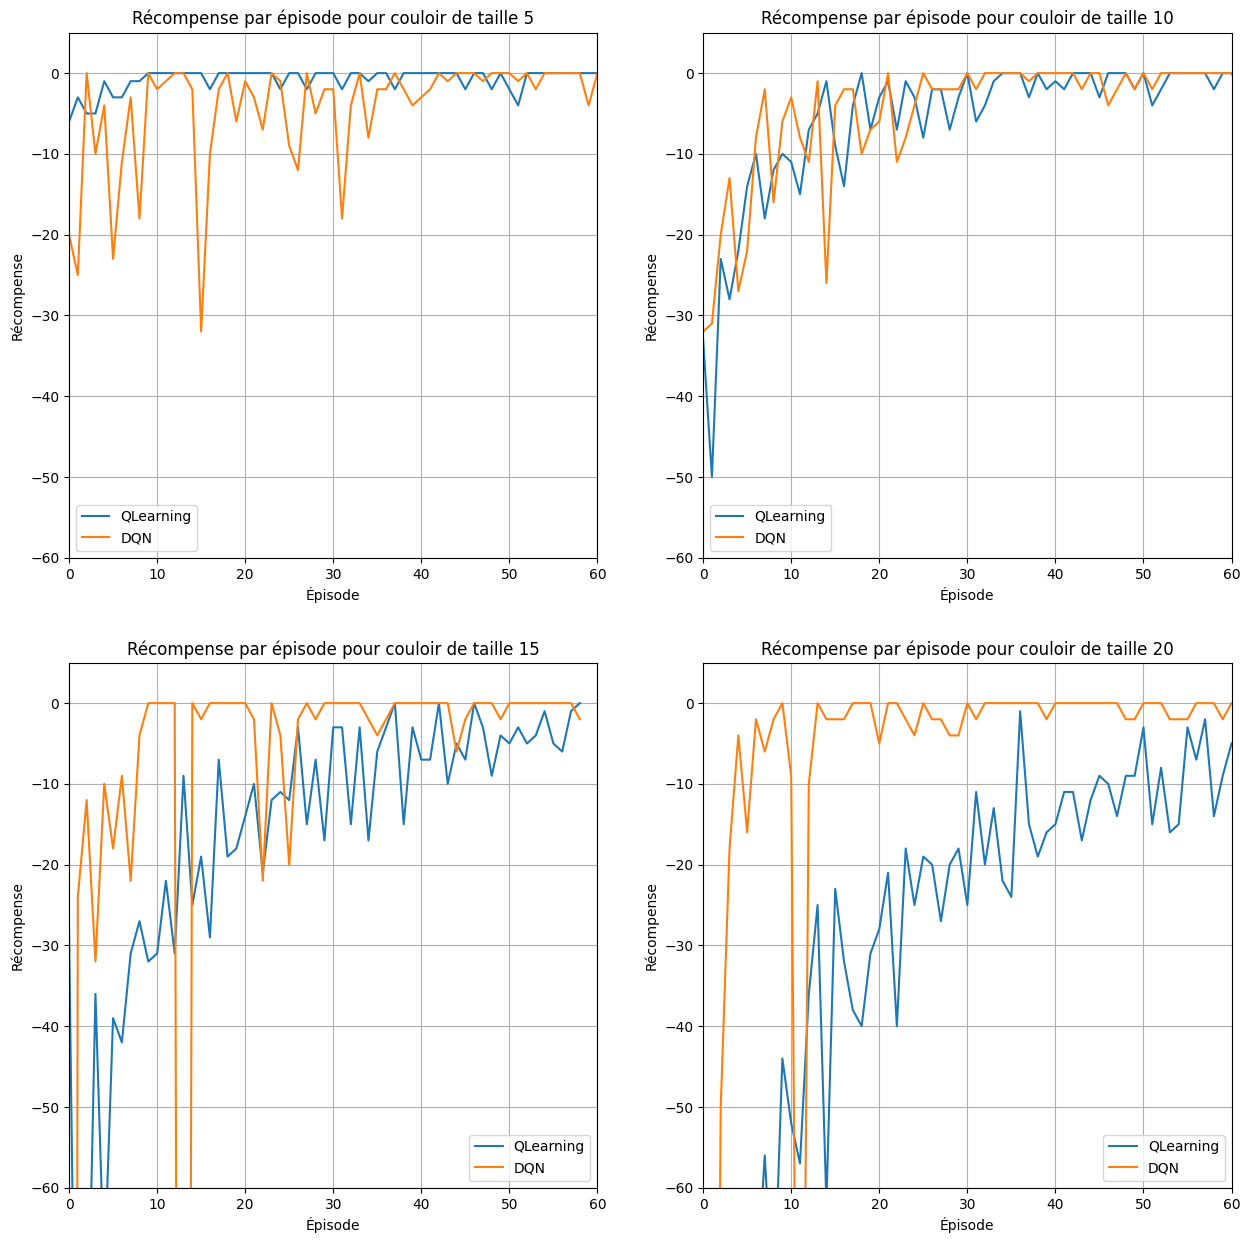

In [5]:
import matplotlib.pyplot as plt

data = [(5, 0, 0), (10, 0, 1), (15, 1, 0), (20, 1, 1)]
fig, axes = plt.subplots(2, 2, figsize=(15, 15))


for (n_states, x, y) in data :
    env = LineWorldEnv(n_states)
    
    DQNmodel, DQNrewards = train_dqn(env)
    QTable, QRewards = train_q_learning(env, episodes = len(DQNrewards))
    
    
    axes[x, y].plot([r - (12-n_states) for r in QRewards], label='QLearning')
    axes[x, y].plot([r - (12-n_states) for r in DQNrewards], label='DQN')
    axes[x, y].set_xlim([0, 60])
    axes[x, y].set_ylim([-60, 5])
    axes[x, y].legend()
    axes[x, y].set_xlabel("Épisode")
    axes[x, y].set_ylabel("Récompense")
    axes[x, y].set_title(f"Récompense par épisode pour couloir de taille {n_states}")
    axes[x, y].grid()
plt.show()

Nous remarquons que la méthode tabulaire est plus efficace lorsque que le couloir est de taille limitée.
Néanmoins lorsque la taille du couloir grandit, la méthode (DQN) faisaint usage d'un réseau à la place d'un tableau (QLearning) semble plus adaptée.